From https://diffusion.csail.mit.edu/


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sympy.physics.qho_1d import psi_n

In [68]:
def shi_t(x_0, t, theta):
    return np.exp( -theta * t) * x_0
def ut_t(x_t, theta):
    return -theta * x_t

In [25]:
t = np.linspace(0, 20, 40)
x_0 = np.linspace(-10, 10, 10)
theta = 0.25
x_t = np.array([shi_t(x, t, theta) for x in x_0])


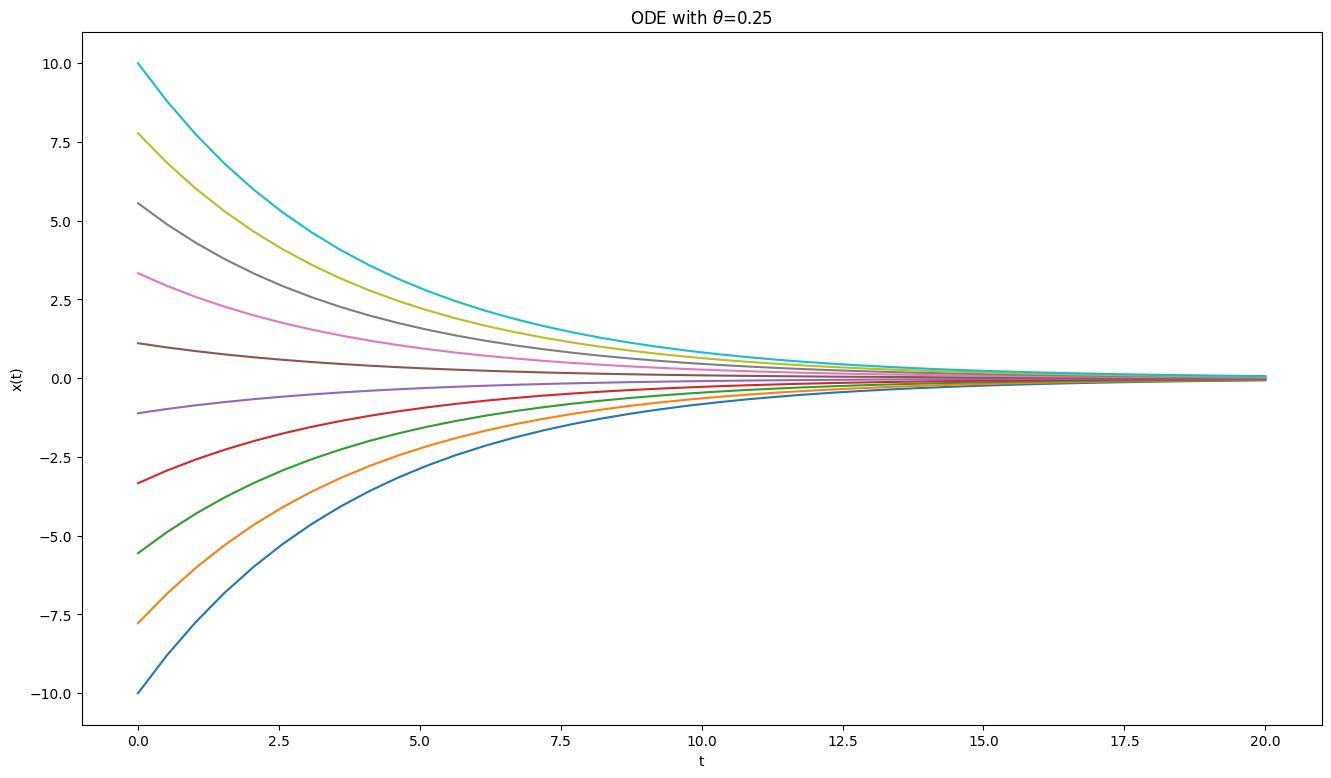

In [31]:
plt.figure(figsize=(16, 9))
for x in x_t:
    plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(f'ODE with $\\theta$={theta}')
plt.show()

In [17]:
def brwon_motion(W_0, t, h=0.25):
    W_t = np.zeros_like(t)
    W_t[0] = W_0
    for i in range(1, len(t)):
        dW = np.random.normal()
        W_t[i] = W_t[i-1] + np.sqrt(h) * dW
    return W_t

In [22]:
t = np.linspace(0, 5, 1000)
W_0 = np.zeros(5)
h = 0.25
W_t = np.array([brwon_motion(w, t, h) for w in W_0])

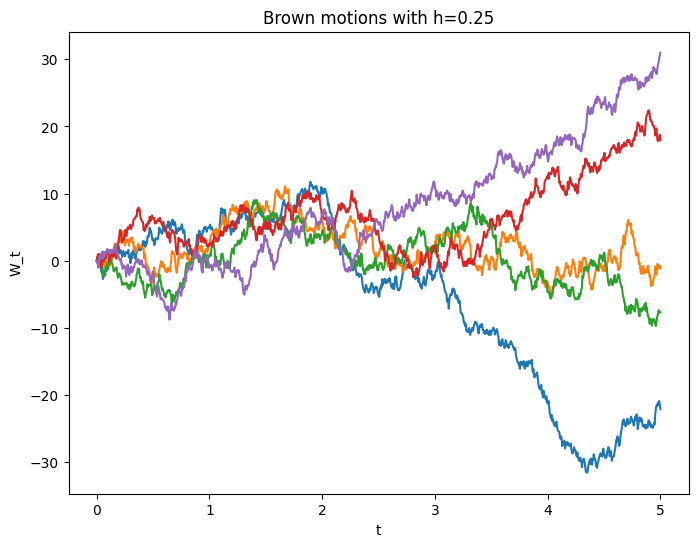

In [23]:
plt.figure(figsize=(8, 6))
for w in W_t:
    plt.plot(t, w)
plt.xlabel('t')
plt.ylabel('W_t')
plt.title(f'Brown motions with h={h}')
plt.show()

In [69]:
def sde_trajectory(x_0, t, theta, sigma, h=0.25):
    x_t = np.zeros((len(t)))
    x_t[0] = x_0
    for i in range(1, len(t)):
        x_t[i] = x_t[i-1] + h * ut_t(x_t[i-1], theta) + sigma * np.sqrt(h) * np.random.normal()
    return x_t

In [70]:
t = np.linspace(0, 20, 1000)
x_0 = np.linspace(-10, 10, 10)
theta = 0.25
sigma = np.array([0,0.25,0.5,1.0])
h = t[1]-t[0]

x_t = np.zeros((len(sigma),len(x_0),len(t)))
for i in range(len(sigma)):
    sigma_i = sigma[i]
    for j in range(len(x_0)):
        x_t[i,j] = sde_trajectory(x_0[j], t, theta, sigma_i, h)



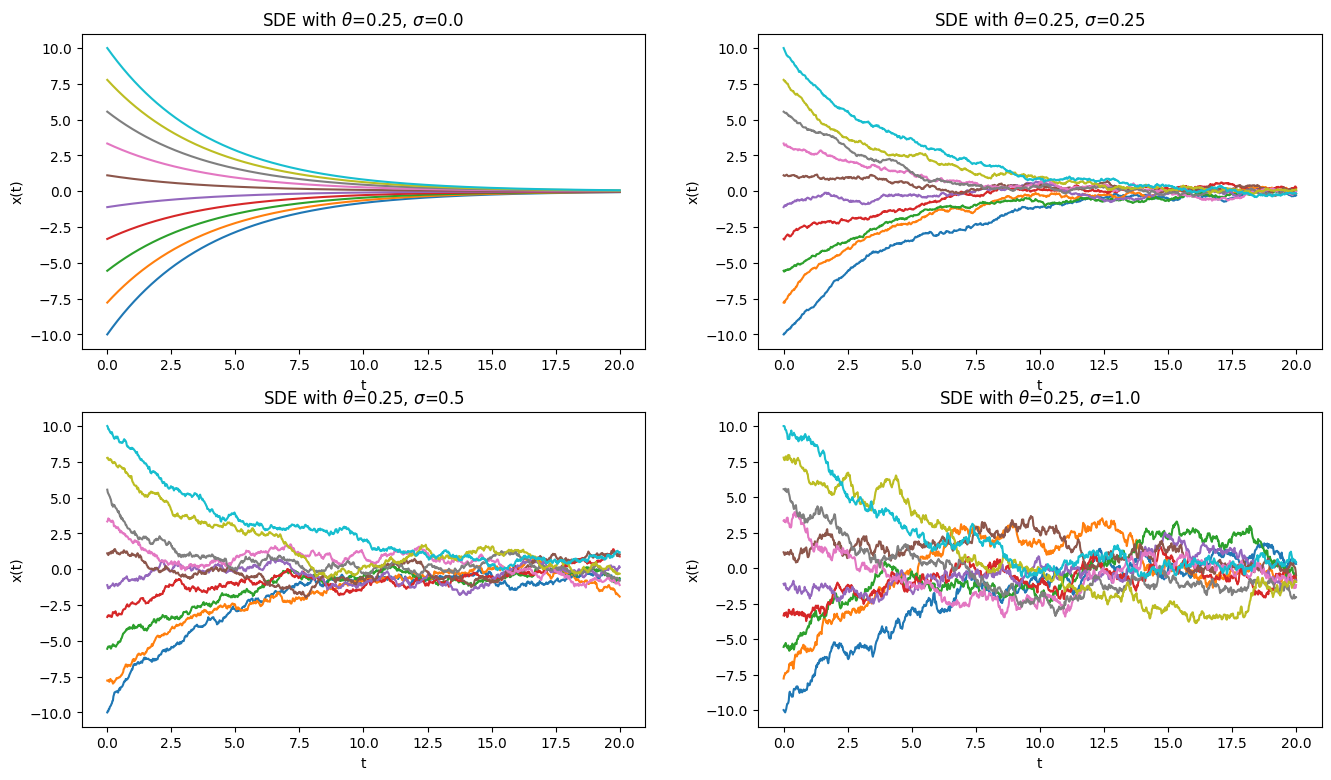

In [71]:
plt.figure(figsize=(16, 9))
for i in range(len(sigma)):
    plt.subplot(2, 2, i+1)
    for j in range(len(x_0)):
        plt.plot(t, x_t[i,j])
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title(f'SDE with $\\theta$={theta}, $\\sigma$={sigma[i]}')

In [56]:
x_t.shape

(4, 10, 100)